## Finding the best neighborhood to start a coffee shop in Toronto


### Business Problem

Toronto is one of the most popular cities in Canada with a high population. Toronto is an international center of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world attracting 1000s of travellers each year. Toronto is well known for restaurants with great food.

In this project, I am planning to analyze four square location data to determine the best neighborhood in Toronto to start a new coffee shop to help people planning to start their own coffee business in Toronto. The analysis will provide various information that will help in the decision making process by the target audience.


### Data Overview

The data that will be used for this analysis includes,

1. A list of  neighbourhoods in Toronto provided via Wikipedia "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
2. Geographical location of each neighbourhood obtained using Geocoder package.
3. Venue data for existing coffee shops in Toronto




### Data Collection

Following wikipedia page shows all postal codes available in Canada with neighborhoods in a table.

<img src="postcodes.JPG">

 First we performed the scraping of the data to convert it into a suitable format which is a pandas dataframe that includes information about Toronto neighborhoods as following.


<!-- ![image.png](attachment:image.png) -->
<img src="neighborhoods.JPG">

The Geographical coordinates of the neighbourhoods with the respective Postal Codes was provided in a CSV file format which we had to attach it to a Pandas data frame.

<img src="locations.JPG">

Later we merged this dataframe with the previous dataframe containing neighborhood information using the common column which is Postal Code.

<img src="merged_df.JPG">

Then we obtained venue data using the foursquare API. First we extracted the following venue list which we will be analyzing further to extract information about coffee shops.

<img src="venues.JPG">

### Methodology

Data cleaning was the first step to follow once identified the required data. The wikipedia page contained boroughs that were unassigned. 
1. Removing rows that had an unassigned borough.
2. If a cell has a borough but a Not assigned neighbourhood, then the neighbourhood will be the same as the borough.

Following is the python implementation of above.


In [7]:
import pandas as pd

# Webpage url        
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Extract tables
dfs = pd.read_html(url)

# print number of tables
print(len(dfs))

# Get first table which is the table of interest                                                                                                           
df = dfs[0]

# Extract required columns                                                                                                           
df2 = df[['Postal Code','Borough','Neighbourhood']]

# get rid of rows with Borough value 'Not assigned'
df2 = df2[df2.Borough != 'Not assigned'].reset_index(drop=True)

mask = df2['Neighbourhood'] == "Not assigned"
df2.loc[mask,'Neighbourhood'] = df2.loc[mask, 'Borough']

df2.head()


3


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Next step is to read the csv file containing latitude and longitude details and merge with the above dataframe.
Following is the python implementation for that.

In [8]:
df_lng_lat = pd.read_csv('Geospatial_Coordinates.csv')

df_merged = df2.merge(df_lng_lat, on="Postal Code", how = 'left')
df_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Since my project focus on Toronto I had to extract only Toronto neighborhoods as follows.

In [9]:
df_merged = df_merged[df_merged['Borough'].str.contains("Toronto")]
df_merged.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


#### Creating a map with Toronto neighborhoods superimposed on that

In [10]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [25]:
latitude = 43.651070
longitude = -79.347015

# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Borough'], df_merged['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

#### Define four square credentials

In [26]:
CLIENT_ID = 'GURYN0HXLCV2RLRBQZSKURSEVN5ZVZTB14HYM5DKEON3KGSW' # your Foursquare ID
CLIENT_SECRET = 'W54MVLZU1PPZFODSDSKH3LDDMIZEIRZMCNXXDBNQ5OQPEFB3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GURYN0HXLCV2RLRBQZSKURSEVN5ZVZTB14HYM5DKEON3KGSW
CLIENT_SECRET:W54MVLZU1PPZFODSDSKH3LDDMIZEIRZMCNXXDBNQ5OQPEFB3


In [12]:
#### Get requests near Toronto city

### Extracting all coffee shops near Toronto into a dataframe

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'coffee',
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
Toronto_venues = getNearbyVenues(names=df_merged['Neighbourhood'],
                                   latitudes=df_merged['Latitude'],
                                   longitudes=df_merged['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [28]:
print(Toronto_venues.shape)
Toronto_venues.head()

(829, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
4,"Regent Park, Harbourfront",43.65426,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop


In [29]:
# the number of venues returned for each neighborhood
num_coffe_shops = Toronto_venues.groupby('Neighborhood').count()
num_coffe_shops.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,22,22,22,22,22,22
"Brockton, Parkdale Village, Exhibition Place",6,6,6,6,6,6
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",1,1,1,1,1,1
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",2,2,2,2,2,2
Central Bay Street,43,43,43,43,43,43


In [30]:
#merge number of coffee shops with padaframe

# num_coffe_shops = num_coffe_shops.drop(['Neighborhood Longitude', 'Venue', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1)
# num_coffe_shops = num_coffe_shops.rename(columns={'Neighborhood Latitude':'Neighborhood' })

df_merged_coffee_shops = df_merged.merge(num_coffe_shops, left_on='Neighbourhood', right_on='Neighborhood', how = 'left')
df_merged_coffee_shops.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,17.0,17.0,17.0,17.0,17.0,17.0
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,26.0,26.0,26.0,26.0,26.0,26.0
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,55.0,55.0,55.0,55.0,55.0,55.0
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,52.0,52.0,52.0,52.0,52.0,52.0
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,1.0,1.0,1.0,1.0,1.0,1.0


## Machine Learning

In [31]:
df_merged_coffee_shops = df_merged_coffee_shops.drop(['Neighborhood Longitude', 'Venue', 'Venue Latitude','Venue Longitude','Venue Category'], axis=1)
df_merged_coffee_shops = df_merged_coffee_shops.rename(columns={'Neighborhood Latitude':'NUmber of coffee shops' })

replacing all Nan vales with 0

In [32]:
df_merged_coffee_shops.head()

df_merged_coffee_shops.isnull().sum(axis = 0)

df_merged_coffee_shops = df_merged_coffee_shops.fillna(0)

df_merged_coffee_shops.isnull().sum(axis = 0)

Postal Code               0
Borough                   0
Neighbourhood             0
Latitude                  0
Longitude                 0
NUmber of coffee shops    0
dtype: int64

#### Cluster Neighborhoods

In [33]:
# set number of clusters
kclusters = 5

# toronto_grouped_clustering = df_merged.drop('Neighbourhood', 1)

toronto_grouped_clustering = df_merged_coffee_shops.drop(['Neighbourhood', 'Borough', 'Postal Code','Latitude','Longitude'], axis=1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print(len(kmeans.labels_))
print(toronto_grouped_clustering.shape[0])

39
39


In [34]:
# add clustering labels

df_merged_coffee_shops.insert(0, 'Cluster Labels', kmeans.labels_)
df_merged_coffee_shops.head()

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude,NUmber of coffee shops
0,0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,17.0
1,2,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,26.0
2,1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,55.0
3,1,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,52.0
4,4,M4E,East Toronto,The Beaches,43.676357,-79.293031,1.0


### Data Analysis

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged_coffee_shops['Latitude'], df_merged_coffee_shops['Longitude'], df_merged_coffee_shops['Neighbourhood'], df_merged_coffee_shops['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

above folium map shows neighborhoods as clusters depending on the number of coffee shops in each neighborhood.
Cluster 0 - Red
Cluster 1 - Purple
Cluster 2 - Turquoise
Cluster 3 - Green
Cluster 4 - Orange

Let's find out the number of coffee shops in each cluster.

In [36]:
# the number of venues returned for each neighborhood
cluster_analysis_df = df_merged_coffee_shops.groupby('Cluster Labels')['NUmber of coffee shops'].sum()
cluster_analysis_df.head()

Cluster Labels
0    129.0
1    248.0
2    214.0
3    198.0
4     40.0
Name: NUmber of coffee shops, dtype: float64

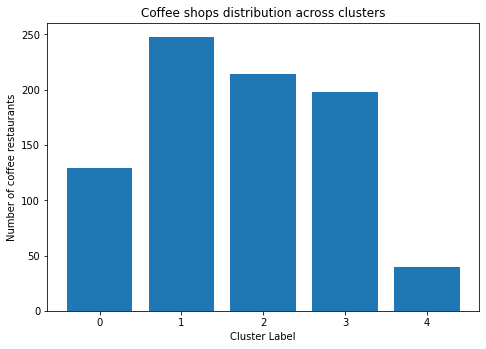

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [0,1,2,3,4]
students = [129,248,214,198,40]
ax.bar(langs,students)

plt.xlabel("Cluster Label")
plt.ylabel("Number of coffee restaurants")
plt.title("Coffee shops distribution across clusters")

plt.show()

## Results


When we have a look at the results we observe that the lowest number of coffee restaurants are in Cluster 4.
So, let's filter out the neighborhoods in cluster 4 with the number of coffee shops available.

In [39]:
df_merged_coffee_shops = df_merged_coffee_shops[df_merged_coffee_shops['Cluster Labels'] == 4]
df_merged_coffee_shops.head()

,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude,NUmber of coffee shops
4,4,M4E,East Toronto,The Beaches,43.676357,-79.293031,1.0
7,4,M6G,Downtown Toronto,Christie,43.669542,-79.422564,6.0
9,4,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,5.0
14,4,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,6.0
15,4,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,2.0


In [40]:
df_merged_coffee_shops.sort_values(by=['NUmber of coffee shops'])


,Cluster Labels,Postal Code,Borough,Neighbourhood,Latitude,Longitude,NUmber of coffee shops
21,4,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307,0.0
29,4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0.0
33,4,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0.0
19,4,M5N,Central Toronto,Roselawn,43.711695,-79.416936,0.0
18,4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0
4,4,M4E,East Toronto,The Beaches,43.676357,-79.293031,1.0
38,4,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,1.0
32,4,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,2.0
15,4,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,2.0
20,4,M4P,Central Toronto,Davisville North,43.712751,-79.390197,3.0


In [43]:
print(df_merged_coffee_shops.shape[0])

17


There are 17 postal codes in cluster 4. 

## Discussion

Most of the coffee shops are in cluster 1 represented by purple in the folium map. Cluster 4 has the least number of coffee shops as we analyzed above. We have come up with all the data for neighborhoods in cluster 4 as well. We see that neighbourhoods like Forest Hill North & West, Forest Hill Road Park has 0 coffee restaulrants.

 Some of the drawbacks of this analysis are — the clustering is completely based on data obtained from the Foursquare API. Also, the analysis does not take into consideration about the population distribution across the neighbourhood that is one of the most important factor when deciding a location to come up with a new business. This concludes the optimal findings for this project and recommends the entrepreneur to open an coffee shop in cluster 4 with little to no competition.

## Conclusion

In conclusion in this project we came up with a business problem which is a real world problem and then identified how we can use foursquare API data to come with a solution to this problem. We followed the actual data science process in the implementation starting from data scleansing, data analysis, applying machine learning algorthms and models and then finally coming up with a solution. We used foursquare API and also the neighborhood data available in wikipedia about Toronto neighborhoods. We used important python libraries such as folium, pandas, matplotlib and etc. 

However, still possible to improve our project by accessign more data that gives insight into the problem. 

